In [1]:
# 평가 방식, 고객만족도 예측
import numpy as np
def ACCURACY(true, pred):
    score = np.mean(true==pred)
    return score


import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

import seaborn as sns # for prettier plots

In [2]:
train_df = pd.read_csv('train.csv', header=0, index_col=0, squeeze=True, encoding='utf-8-sig')
test_df = pd.read_csv('test.csv',encoding='utf-8-sig')

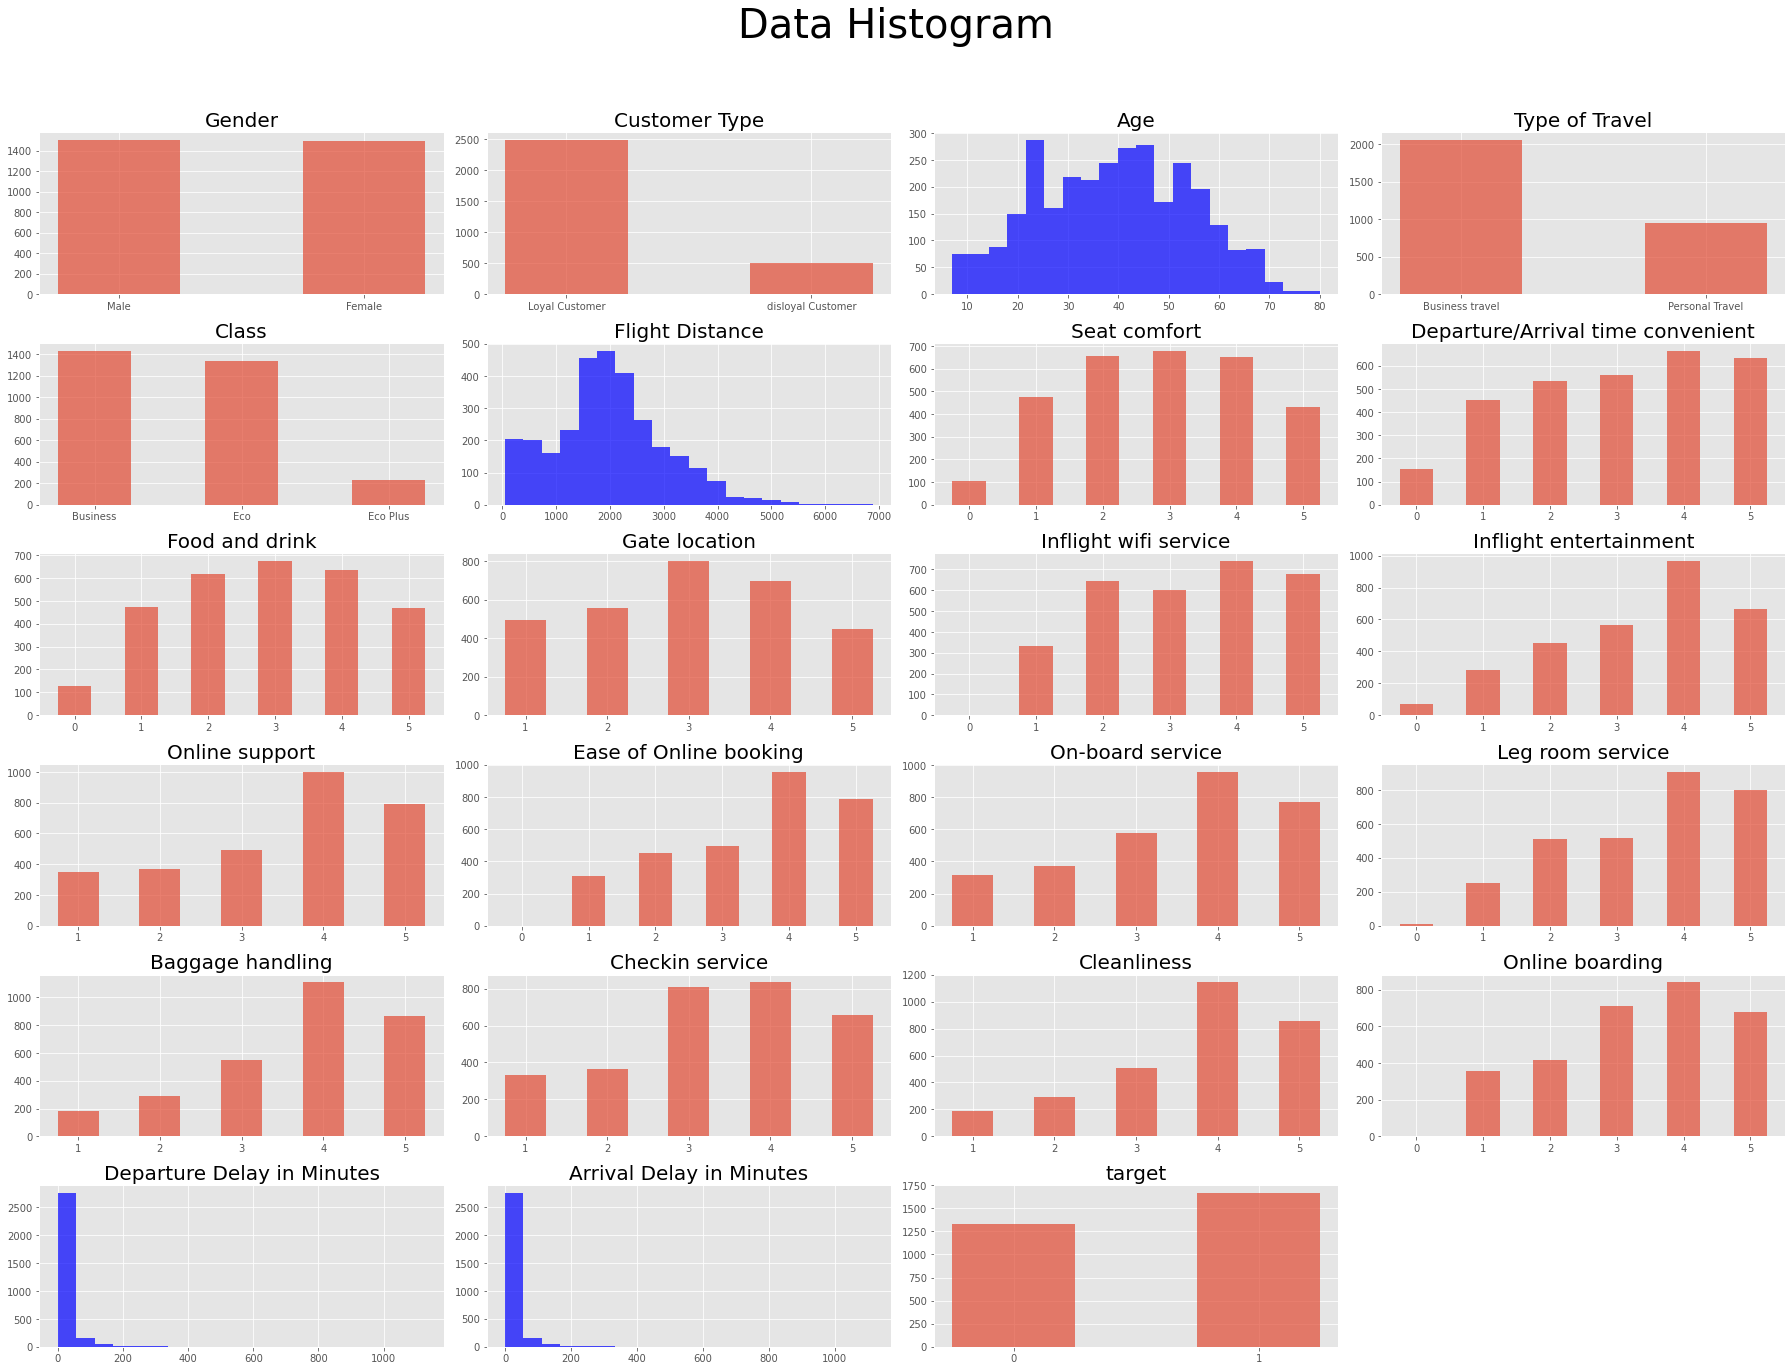

In [5]:
#이거 미쳤다 이건 공유해야해 ,이사람은 EDA의신인가?

plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)
#fig, ax -> ax 만을 가지는 하나의 figu
# id는 제외하고 시각화
cols = train_df.columns
for i in range(len(cols)):
    # plt.subplot(5, 5, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.subplot(6, 4, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train_df[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(train_df[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train_df[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()